<a href="https://colab.research.google.com/github/LCaravaggio/EscueladeInnovacion/blob/main/PIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de imágen


In [16]:
import requests
from PIL import Image
from io import BytesIO

url = 'https://www.bellasartes.gob.ar/media/uploads/exhibiciones/8_12_Caravaggio_03_SanGirolamochescrive-Caravaggio.jpg'
response = requests.get(url)

if response.status_code == 200:
    img = Image.open(BytesIO(response.content))
else:
    print("Failed to download the image")

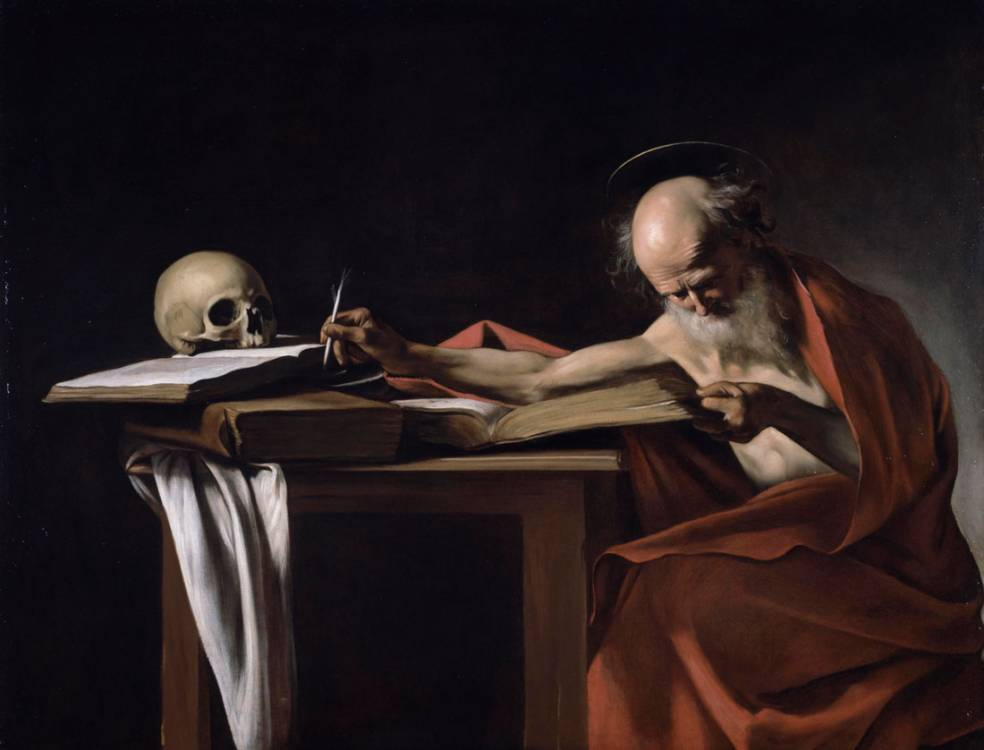

In [17]:
display(img)

# Características

In [18]:
img.size

(984, 750)

In [19]:
img.format

'JPEG'

In [20]:
img.mode

'RGB'

# Thumbnail

In [23]:
img.thumbnail((256,256))

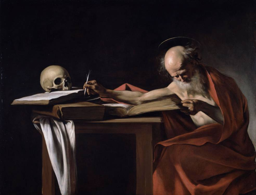

In [24]:
display(img)

# Rotación

In [25]:
out = img.rotate(45)

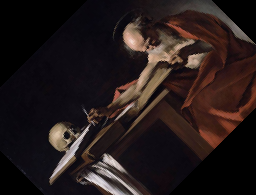

In [26]:
display(out)

In [27]:
out=img.transpose(method=Image.FLIP_TOP_BOTTOM)

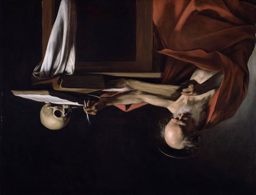

In [28]:
display(out)

# Cropeado

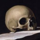

In [33]:
left = 35
top = 60
right = 75
bottom = 100

out = img.crop((left, top, right, bottom))
out

In [34]:
out.save("croped_img.jpg")

# Blureado

https://pillow.readthedocs.io/en/stable/reference/ImageFilter.html

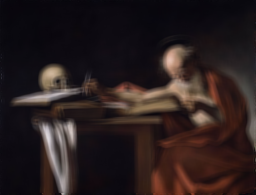

In [35]:
from PIL import ImageFilter
img.filter(ImageFilter.BLUR)

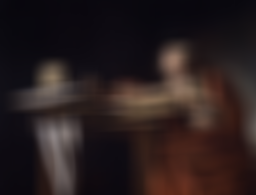

In [36]:
img.filter(ImageFilter.BoxBlur(10))

# Clarin

In [29]:
%%capture
!pip install fer

In [30]:
from fer import FER
import requests
from PIL import Image
from io import BytesIO

In [31]:
url = 'https://tapas.clarin.com/tapa/2023/12/29/20231229.jpg'
response = requests.get(url)

if response.status_code == 200:
    img = Image.open(BytesIO(response.content))
else:
    print("Failed to download the image")

In [32]:
import tempfile
with tempfile.NamedTemporaryFile(suffix='.jpg', delete=False) as temp_file:
    img.save(temp_file.name)
    temp_file_path = temp_file.name

In [33]:
detector = FER()
emotions = detector.detect_emotions(temp_file_path)
print(emotions)

[{'box': array([1343,  118,  100,  100], dtype=int32), 'emotions': {'angry': 0.28, 'disgust': 0.01, 'fear': 0.27, 'happy': 0.0, 'sad': 0.16, 'surprise': 0.04, 'neutral': 0.23}}, {'box': array([1036,  120,  101,  101], dtype=int32), 'emotions': {'angry': 0.75, 'disgust': 0.0, 'fear': 0.07, 'happy': 0.14, 'sad': 0.02, 'surprise': 0.0, 'neutral': 0.01}}]


In [34]:
emotions[0]['box'][0]

1343

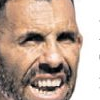

{'angry': 0.75, 'disgust': 0.0, 'fear': 0.07, 'happy': 0.14, 'sad': 0.02, 'surprise': 0.0, 'neutral': 0.01}


In [36]:
face=1

left=emotions[face]['box'][0]
top=emotions[face]['box'][1]
right=emotions[face]['box'][0]+emotions[0]['box'][2]
bottom=emotions[face]['box'][1]+emotions[0]['box'][3]
display(img.crop((left, top, right, bottom)))

print(emotions[face]['emotions'])